# Milestone 2 Phase 1

# 1. Perkenalan

Jimmy Jaya Nugraha 

# 2. Import Libraries

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.impute import SimpleImputer
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import make_scorer
from sklearn.ensemble import AdaBoostClassifier
from sklearn.pipeline import make_pipeline
import pickle
import warnings
warnings.filterwarnings("ignore")


# 3. Data Loading

In [46]:
# Meload dataset
df_ori = pd.read_csv('water_potability.csv')

In [47]:
# Menduplikat dataset
df = df_ori.copy()

Keterangan dari setiap kolom dataset:

1. pH value:
PH is an important parameter in evaluating the acid–base balance of water. It is also the indicator of acidic or alkaline condition of water status. WHO has recommended maximum permissible limit of pH from 6.5 to 8.5. The current investigation ranges were 6.52–6.83 which are in the range of WHO standards.


2. Hardness:
Hardness is mainly caused by calcium and magnesium salts. These salts are dissolved from geologic deposits through which water travels. The length of time water is in contact with hardness producing material helps determine how much hardness there is in raw water. Hardness was originally defined as the capacity of water to precipitate soap caused by Calcium and Magnesium.

3. Solids (Total dissolved solids - TDS):
Water has the ability to dissolve a wide range of inorganic and some organic minerals or salts such as potassium, calcium, sodium, bicarbonates, chlorides, magnesium, sulfates etc. These minerals produced un-wanted taste and diluted color in appearance of water. This is the important parameter for the use of water. The water with high TDS value indicates that water is highly mineralized. Desirable limit for TDS is 500 mg/l and maximum limit is 1000 mg/l which prescribed for drinking purpose.

4. Chloramines:
Chlorine and chloramine are the major disinfectants used in public water systems. Chloramines are most commonly formed when ammonia is added to chlorine to treat drinking water. Chlorine levels up to 4 milligrams per liter (mg/L or 4 parts per million (ppm)) are considered safe in drinking water.

5. Sulfate:
Sulfates are naturally occurring substances that are found in minerals, soil, and rocks. They are present in ambient air, groundwater, plants, and food. The principal commercial use of sulfate is in the chemical industry. Sulfate concentration in seawater is about 2,700 milligrams per liter (mg/L). It ranges from 3 to 30 mg/L in most freshwater supplies, although much higher concentrations (1000 mg/L) are found in some geographic locations.

6. Conductivity:
Pure water is not a good conductor of electric current rather’s a good insulator. Increase in ions concentration enhances the electrical conductivity of water. Generally, the amount of dissolved solids in water determines the electrical conductivity. Electrical conductivity (EC) actually measures the ionic process of a solution that enables it to transmit current. According to WHO standards, EC value should not exceeded 400 μS/cm.

7. Organic_carbon:
Total Organic Carbon (TOC) in source waters comes from decaying natural organic matter (NOM) as well as synthetic sources. TOC is a measure of the total amount of carbon in organic compounds in pure water. According to US EPA < 2 mg/L as TOC in treated / drinking water, and < 4 mg/Lit in source water which is use for treatment.

8. Trihalomethanes:
THMs are chemicals which may be found in water treated with chlorine. The concentration of THMs in drinking water varies according to the level of organic material in the water, the amount of chlorine required to treat the water, and the temperature of the water that is being treated. THM levels up to 80 ppm is considered safe in drinking water.

9. Turbidity:
The turbidity of water depends on the quantity of solid matter present in the suspended state. It is a measure of light emitting properties of water and the test is used to indicate the quality of waste discharge with respect to colloidal matter. The mean turbidity value obtained for Wondo Genet Campus (0.98 NTU) is lower than the WHO recommended value of 5.00 NTU.

10. Potability:
Indicates if water is safe for human consumption where 1 means Potable and 0 means Not potable.

# 4. Exploratory Data Analysis (EDA)

In [48]:
# Melihat contoh data head
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [49]:
# Melihat info data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [50]:
# Melihat jumlah missing value
df.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

> Terdapat missing value pada data tersebut sehingga akan dilakukan imputasi di data preprocessing

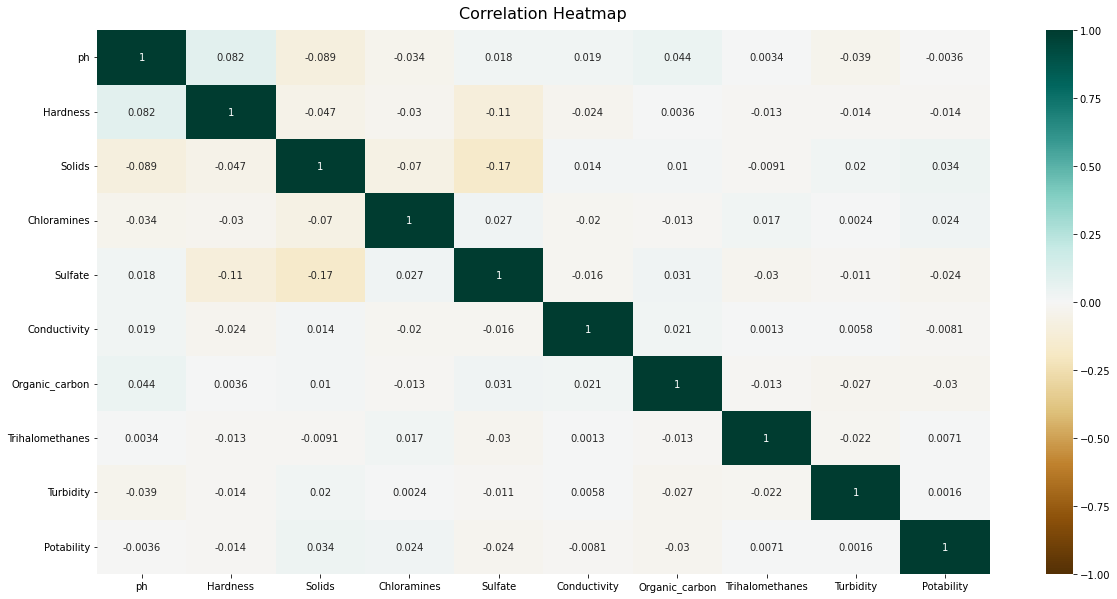

In [51]:
# melihat korelasi data dengan heat map
plt.figure(figsize=(20, 10))
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':16}, pad=12)
plt.show()

> Terlihat tidak terdapat korelasi antara fitur dengan fitur maupun fitur dengan target (Potability).

In [52]:
# Melihat describe data
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


> Data terlihat memiliki mean dekat dengan median , serta standard deviasi yang relatif kecil.

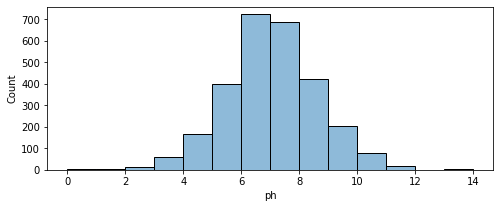

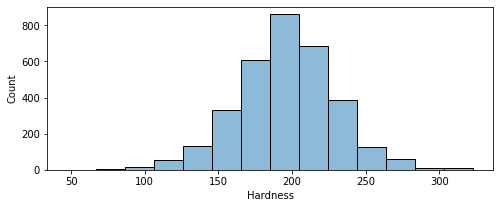

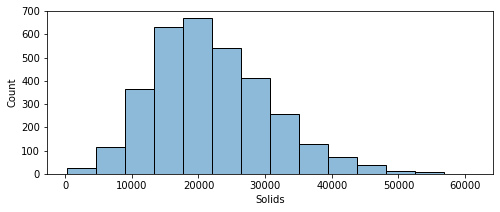

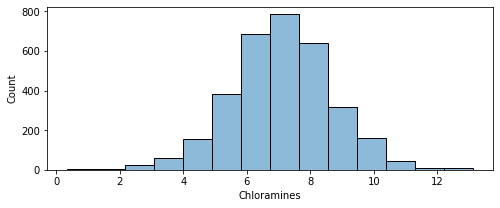

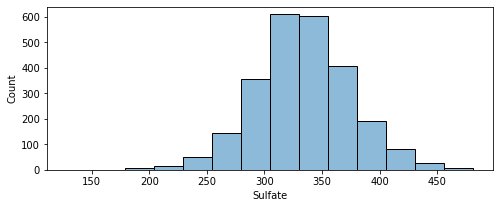

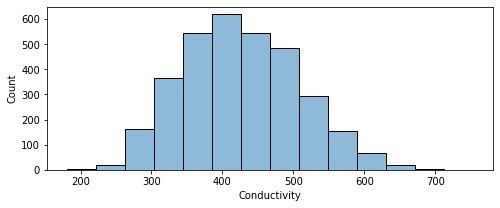

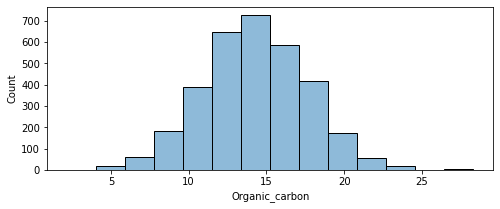

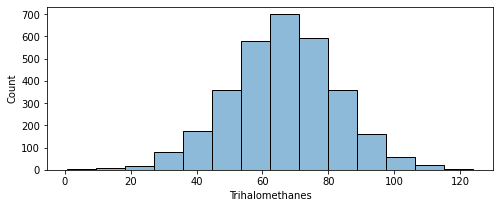

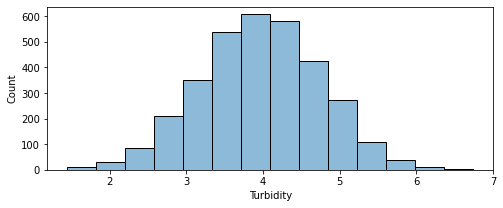

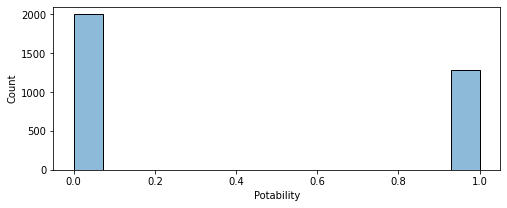

In [53]:
# Melihat sebaran data pada setiap fitur
for i in df.columns:
    plt.figure(figsize=(8, 3), facecolor='white')
    sns.histplot(df[i], bins=14, alpha=0.5, palette='pastel')

In [54]:
# melihat skewness dari data
df.skew()

ph                 0.025630
Hardness          -0.039342
Solids             0.621634
Chloramines       -0.012098
Sulfate           -0.035947
Conductivity       0.264490
Organic_carbon     0.025533
Trihalomethanes   -0.083031
Turbidity         -0.007817
Potability         0.450784
dtype: float64

> Data terlihat normal dari sebarannya untuk semua fitur dan kolom target

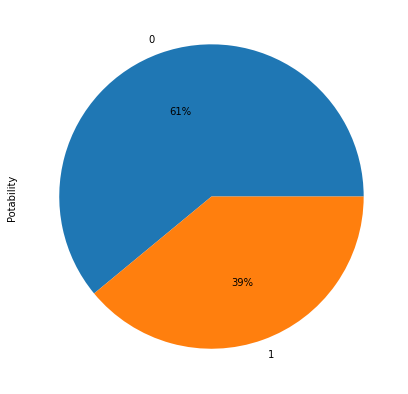

In [55]:
# melihat grafik countplot dari target Potability
plt.figure(figsize=(12, 7), facecolor='white')
df['Potability'].value_counts().plot(kind='pie', autopct='%.0f%%')
plt.show()

> Data terlihat lebih banyak yang 0 atau not potable (tidak dapat diminum)

<Figure size 864x504 with 0 Axes>

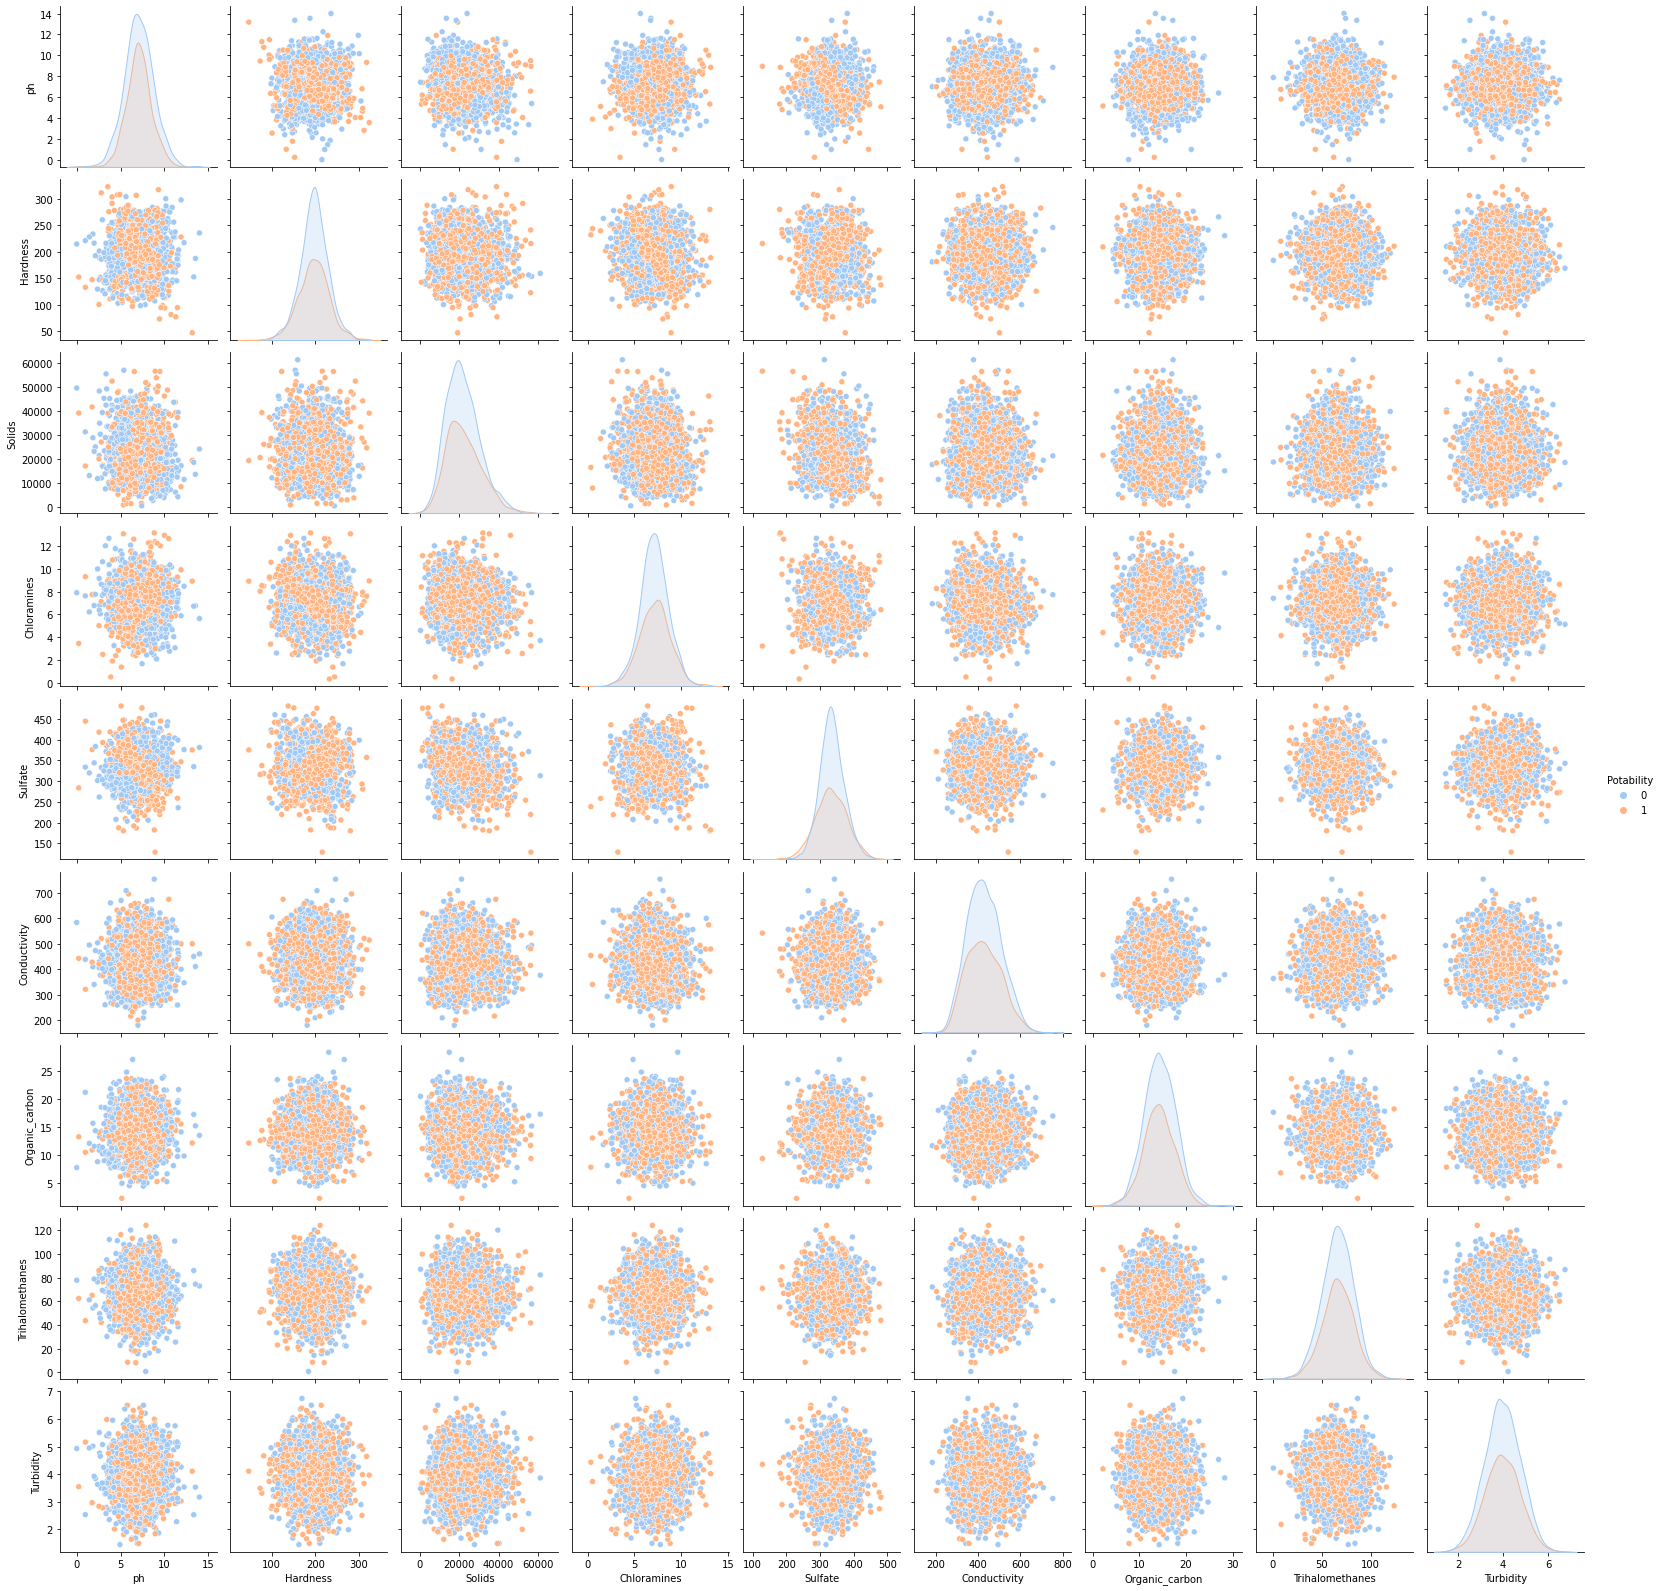

In [138]:
# Melihat pairplot dari data frame
plt.figure(figsize=(12, 7), facecolor='white')
sns.pairplot(df, hue='Potability', palette='pastel')
plt.show()

> Tidak terlihat adanya korelasi ataupun hubungan unik antara fitur.

# 5. Data Preprocessing

## Memisahkan data train, data test, dan inference

In [57]:
# Mendefinisikan variabel target
target = 'Potability'

# Memisahkan Inference-set from dataset
df_inf =df.sample(10, random_state=25)
df_inf.reset_index(drop=True, inplace=True)
X_inf = df_inf.drop(target, axis=1)
y_inf = df_inf[target]

# Mendrop data yang dijadikan df_inf dan reset index
df_tanpa_inf=df.drop(df_inf.index)
df_tanpa_inf.reset_index(drop=True, inplace=True)

# Memisahkan target dan data
X =df_tanpa_inf.drop(target, axis=1)
y =df_tanpa_inf[target]

# Memisahkan data training dan test
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size =0.2,random_state=25, stratify=y)

# Melihat jumlah train set dan test set
print('X_train :',X_train.shape)
print('X_test :',X_test.shape)
print('X_inf :',X_inf.shape)

X_train : (2612, 9)
X_test : (654, 9)
X_inf : (10, 9)


## Handling Outlayer

In [58]:
# Membuat fungsi remove outlayer normal distribution
def remove_outlayer_normal (data, y_pasangan, column):
    mean = data[column].mean()
    std = data[column].std()
    outlayer = data[column][(data[column] < mean - 3*std) | (data[column] > mean + 3*std)]
    data.drop(outlayer.index, inplace=True)
    data.reset_index()
    y_pasangan.drop(outlayer.index, inplace=True)
    y_pasangan.reset_index()
    if outlayer.index.shape[0]==0:
        print('Kolom',column ,'tidak memiliki outlayer')
    else:
        print('Shape setelah drop outlayer (normal) di kolom',column,' : ',data.shape)
    return data, y_pasangan
    

# Membuat fungsi remove outlayer skewed distribution
def remove_outlayer_skewed (data,y_pasangan, column):
    q1 = data[column].quantile(0.25)
    q3 = data[column].quantile(0.75)
    iqr = q3 - q1
    outlayer = data[column][(data[column] < q1 - 3*iqr) | (data[column] > q3 + 3*iqr)]
    data.drop(outlayer.index, inplace=True)
    data.reset_index()
    y_pasangan.drop(outlayer.index, inplace=True)
    y_pasangan.reset_index()
    if outlayer.index.shape[0]==0:
        print('Kolom',column ,'tidak memiliki outlayer')
    else:
        print('Shape setelah drop outlayer (skewed) di kolom',column,' : ',data.shape)
    return data, y_pasangan

# Menggabungkan fungsi remove outlayer normal dan skewed
def remove_outlayer_all (X_data, y_data, column):
    awal = X_data.shape[0]
    print('shape awal :', X_data.shape)
    for i in X_data[column]:
        if X_data[i].skew()>0.5:
            remove_outlayer_skewed(X_data, y_data, i)
        else:
            remove_outlayer_normal(X_data, y_data, i)
    akhir = X_data.shape[0]
    print('Jumlah data awal : ', awal)
    print('Jumlah data akhir: ', akhir)
    print('persentase selisih : ', ((awal-akhir)/awal)*100,'%')
    return X_data, y_data

In [59]:
# Meremove outlayer dari data training
X_train, y_train = remove_outlayer_all(X_train, y_train, X_train.columns)

shape awal : (2612, 9)
Shape setelah drop outlayer (normal) di kolom ph  :  (2598, 9)
Shape setelah drop outlayer (normal) di kolom Hardness  :  (2585, 9)
Kolom Solids tidak memiliki outlayer
Shape setelah drop outlayer (normal) di kolom Chloramines  :  (2568, 9)
Shape setelah drop outlayer (normal) di kolom Sulfate  :  (2554, 9)
Shape setelah drop outlayer (normal) di kolom Conductivity  :  (2550, 9)
Shape setelah drop outlayer (normal) di kolom Organic_carbon  :  (2547, 9)
Shape setelah drop outlayer (normal) di kolom Trihalomethanes  :  (2538, 9)
Shape setelah drop outlayer (normal) di kolom Turbidity  :  (2530, 9)
Jumlah data awal :  2612
Jumlah data akhir:  2530
persentase selisih :  3.139356814701378 %


In [60]:
# Melihat Xtrain shape dan ytrain shape
print('X_train shape :', X_train.shape)
print('y_train shape :', y_train.shape)

X_train shape : (2530, 9)
y_train shape : (2530,)


## Handling Missing Value

In [61]:
# Melihat ada tidaknya missing value
X_train.isnull().sum()

ph                 390
Hardness             0
Solids               0
Chloramines          0
Sulfate            587
Conductivity         0
Organic_carbon       0
Trihalomethanes    124
Turbidity            0
dtype: int64

In [62]:
# Melakukan fillna pada setiap kolom X train dan X test dengan SimpleImputer
# Mendefinisikan simple imputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(X_train)
X_train_impute= imputer.transform(X_train)
X_test_impute = imputer.transform(X_test)

In [63]:
# Melihat ada tidaknya missing value
pd.DataFrame(X_train_impute, columns= X_train.columns).isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
dtype: int64

In [64]:
# Melihat ada tidaknya missing value
pd.DataFrame(X_test_impute, columns= X_test.columns).isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
dtype: int64

## Melakukan Feature Scaling

In [65]:
# Mendefinisikan Feature Scalling dengan StandardScaler
scaler = StandardScaler()

# Fit hanya kolom X_train
scaler.fit(X_train_impute)

# Transform X_train dan X_test
X_train_scaled = scaler.transform(X_train_impute)
X_test_scaled = scaler.transform(X_test_impute)


In [66]:
# Melihat shape dari yang sudah discale
X_train_scaled.shape

(2530, 9)

In [67]:
# Melihat contoh hasil scaling
X_train_scaled[:1]

array([[ 0.42291695,  0.12053719,  1.16882668,  0.35279748, -1.26080421,
         1.9490863 ,  0.76260446, -1.73119015, -0.88561622]])

## Uji VIF

Uji VIF dilakukan setelah data discaling dan tidak ada missing value

In [68]:
# Cek Multicollinearity
vif_data = pd.DataFrame()
vif_data['feature'] = X_train.columns

# menghitung nilai VIF dari setiap feature
vif_data['VIF'] = [variance_inflation_factor(X_train_scaled, i) for i in range(len(X_train.columns))]

vif_data

,feature,VIF
0,ph,1.026763
1,Hardness,1.026902
2,Solids,1.031593
3,Chloramines,1.015373
4,Sulfate,1.021887
5,Conductivity,1.002670
6,Organic_carbon,1.003122
7,Trihalomethanes,1.002838
8,Turbidity,1.002046


> Data dipastikan tidak memiliki Multicollinearity karena VIF semuany di bawah 5

# 6. Model Definition, Training, dan Testing

## Model Definition

In [69]:
# Mendefinisikan X_train_final
X_train_final = X_train_scaled

In [70]:
# Mendefinisikan Logistic Regression
logreg = LogisticRegression(random_state=22, max_iter=1000)

# Mendefinisikan SVM
svm = SVC(random_state=22, max_iter=2000)

# Mendefinisikan Decision Tree
dt = DecisionTreeClassifier(random_state=22)

# Mendefinisikan Random Forest
rf = RandomForestClassifier(n_estimators=100,random_state=22)

# Mendefinisikan KNN classifier
knn = KNeighborsClassifier()

## Cross Validation Model Awal

> Berhubung dianggap penting agar model tidak salah memprediksi khususnya pada air yang tidak bisa diminum justru diprediksi bisa diminum, maka nilai recall pada pos label 0 merupakan nilai yang penting dan akan dijadikan sebagai scorer

In [71]:
# Membuat scorer berisikan recall pos label 0
recall_0= make_scorer(recall_score, pos_label=0)

### Logistic Reggresion

In [72]:
# Melakukan cross validation logreg dengan cross validation
accuracy_train_cross_val_logreg_1 = cross_val_score(logreg, X_train_final, y_train, cv=5, scoring = 'accuracy')
print('Accuracy - All - Cross Validation  : ', accuracy_train_cross_val_logreg_1)
print('Accuracy - Mean - Cross Validation : ', accuracy_train_cross_val_logreg_1.mean())
print('Accuracy - Std - Cross Validation  : ', accuracy_train_cross_val_logreg_1.std())
print('Accuracy - Range of Train-Set       : ', (accuracy_train_cross_val_logreg_1.mean()-accuracy_train_cross_val_logreg_1.std()) , '-', (accuracy_train_cross_val_logreg_1.mean()+accuracy_train_cross_val_logreg_1.std()))

Accuracy - All - Cross Validation  :  [0.61264822 0.61462451 0.61462451 0.61462451 0.61264822]
Accuracy - Mean - Cross Validation :  0.6138339920948617
Accuracy - Std - Cross Validation  :  0.0009681777639459146
Accuracy - Range of Train-Set       :  0.6128658143309158 - 0.6148021698588075


In [73]:
# Melakukan cross validation logreg dengan cross validation
recall_0_train_cross_val_logreg_1 = cross_val_score(logreg, X_train_final, y_train, cv=5, scoring = recall_0)
print('recall_0 - All - Cross Validation  : ', recall_0_train_cross_val_logreg_1)
print('recall_0 - Mean - Cross Validation : ', recall_0_train_cross_val_logreg_1.mean())
print('recall_0 - Std - Cross Validation  : ', recall_0_train_cross_val_logreg_1.std())
print('recall_0 - Range of Train-Set       : ', (recall_0_train_cross_val_logreg_1.mean()-recall_0_train_cross_val_logreg_1.std()) , '-', (recall_0_train_cross_val_logreg_1.mean()+recall_0_train_cross_val_logreg_1.std()))

recall_0 - All - Cross Validation  :  [1.         1.         1.         1.         0.99678457]
recall_0 - Mean - Cross Validation :  0.9993569131832798
recall_0 - Std - Cross Validation  :  0.0012861736334405017
recall_0 - Range of Train-Set       :  0.9980707395498393 - 1.0006430868167202


In [74]:
# melihat classification report logreg
print(classification_report(y_train, logreg.fit(X_train_final, y_train).predict(X_train_final)))

              precision    recall  f1-score   support

           0       0.61      1.00      0.76      1554
           1       0.00      0.00      0.00       976

    accuracy                           0.61      2530
   macro avg       0.31      0.50      0.38      2530
weighted avg       0.38      0.61      0.47      2530



> Model logreg tidak akan digunakan karena nilai classification report pada pos label 1 nya sama dengan 0

### SVM

In [75]:
# Melakukan cross validation svm dengan cross validation
accuracy_train_cross_val_svm_1 = cross_val_score(svm, X_train_final, y_train, cv=5, scoring = 'accuracy')
print('Accuracy - All - Cross Validation  : ', accuracy_train_cross_val_svm_1)
print('Accuracy - Mean - Cross Validation : ', accuracy_train_cross_val_svm_1.mean())
print('Accuracy - Std - Cross Validation  : ', accuracy_train_cross_val_svm_1.std())
print('Accuracy - Range of Train-Set       : ', (accuracy_train_cross_val_svm_1.mean()-accuracy_train_cross_val_svm_1.std()) , '-', (accuracy_train_cross_val_svm_1.mean()+accuracy_train_cross_val_svm_1.std()))

Accuracy - All - Cross Validation  :  [0.68774704 0.68379447 0.67786561 0.65810277 0.6798419 ]
Accuracy - Mean - Cross Validation :  0.6774703557312253
Accuracy - Std - Cross Validation  :  0.010261466391895015
Accuracy - Range of Train-Set       :  0.6672088893393302 - 0.6877318221231203


In [76]:
# Melakukan cross validation svm dengan cross validation
recall_0_train_cross_val_svm_1 = cross_val_score(svm, X_train_final, y_train, cv=5, scoring = recall_0)
print('recall_0 - All - Cross Validation  : ', recall_0_train_cross_val_svm_1)
print('recall_0 - Mean - Cross Validation : ', recall_0_train_cross_val_svm_1.mean())
print('recall_0 - Std - Cross Validation  : ', recall_0_train_cross_val_svm_1.std())
print('recall_0 - Range of Train-Set       : ', (recall_0_train_cross_val_svm_1.mean()-recall_0_train_cross_val_svm_1.std()) , '-', (recall_0_train_cross_val_svm_1.mean()+recall_0_train_cross_val_svm_1.std()))

recall_0 - All - Cross Validation  :  [0.91290323 0.93890675 0.92604502 0.91961415 0.92604502]
recall_0 - Mean - Cross Validation :  0.9247028316564672
recall_0 - Std - Cross Validation  :  0.008607899666508241
recall_0 - Range of Train-Set       :  0.916094931989959 - 0.9333107313229754


> Model SVM akan dilakukan hyperparameter tuning karena nilai mean cross validationnya cukup baik.

### Decision Tree

In [77]:
# Melakukan cross validation dt dengan cross validation
accuracy_train_cross_val_dt_1 = cross_val_score(dt, X_train_final, y_train, cv=5, scoring = 'accuracy')
print('Accuracy - All - Cross Validation  : ', accuracy_train_cross_val_dt_1)
print('Accuracy - Mean - Cross Validation : ', accuracy_train_cross_val_dt_1.mean())
print('Accuracy - Std - Cross Validation  : ', accuracy_train_cross_val_dt_1.std())
print('Accuracy - Range of Train-Set       : ', (accuracy_train_cross_val_dt_1.mean()-accuracy_train_cross_val_dt_1.std()) , '-', (accuracy_train_cross_val_dt_1.mean()+accuracy_train_cross_val_dt_1.std()))

Accuracy - All - Cross Validation  :  [0.5770751  0.60079051 0.60474308 0.55533597 0.56126482]
Accuracy - Mean - Cross Validation :  0.5798418972332016
Accuracy - Std - Cross Validation  :  0.020060992158813455
Accuracy - Range of Train-Set       :  0.5597809050743882 - 0.599902889392015


In [78]:
# Melakukan cross validation dt dengan cross validation
recall_0_train_cross_val_dt_1 = cross_val_score(dt, X_train_final, y_train, cv=5, scoring = recall_0)
print('recall_0 - All - Cross Validation  : ', recall_0_train_cross_val_dt_1)
print('recall_0 - Mean - Cross Validation : ', recall_0_train_cross_val_dt_1.mean())
print('recall_0 - Std - Cross Validation  : ', recall_0_train_cross_val_dt_1.std())
print('recall_0 - Range of Train-Set       : ', (recall_0_train_cross_val_dt_1.mean()-recall_0_train_cross_val_dt_1.std()) , '-', (recall_0_train_cross_val_dt_1.mean()+recall_0_train_cross_val_dt_1.std()))

recall_0 - All - Cross Validation  :  [0.63870968 0.66881029 0.70096463 0.62700965 0.62700965]
recall_0 - Mean - Cross Validation :  0.652500777927601
recall_0 - Std - Cross Validation  :  0.028651475284648138
recall_0 - Range of Train-Set       :  0.6238493026429528 - 0.6811522532122491


> Model Decision Tree akan dilakukan hyperparameter tuning untuk meningkatkan recall_0nya

### Random Forest

In [79]:
# Melakukan cross validation rf dengan cross validation
accuracy_train_cross_val_rf_1 = cross_val_score(rf, X_train_final, y_train, cv=5, scoring = 'accuracy')
print('Accuracy - All - Cross Validation  : ', accuracy_train_cross_val_rf_1)
print('Accuracy - Mean - Cross Validation : ', accuracy_train_cross_val_rf_1.mean())
print('Accuracy - Std - Cross Validation  : ', accuracy_train_cross_val_rf_1.std())
print('Accuracy - Range of Train-Set       : ', (accuracy_train_cross_val_rf_1.mean()-accuracy_train_cross_val_rf_1.std()) , '-', (accuracy_train_cross_val_rf_1.mean()+accuracy_train_cross_val_rf_1.std()))

Accuracy - All - Cross Validation  :  [0.6541502  0.65810277 0.64229249 0.65612648 0.64822134]
Accuracy - Mean - Cross Validation :  0.6517786561264822
Accuracy - Std - Cross Validation  :  0.005782110212777788
Accuracy - Range of Train-Set       :  0.6459965459137045 - 0.65756076633926


In [80]:
# Melakukan cross validation rf dengan cross validation
recall_0_train_cross_val_rf_1 = cross_val_score(rf, X_train_final, y_train, cv=5, scoring = recall_0)
print('recall_0 - All - Cross Validation  : ', recall_0_train_cross_val_rf_1)
print('recall_0 - Mean - Cross Validation : ', recall_0_train_cross_val_rf_1.mean())
print('recall_0 - Std - Cross Validation  : ', recall_0_train_cross_val_rf_1.std())
print('recall_0 - Range of Train-Set       : ', (recall_0_train_cross_val_rf_1.mean()-recall_0_train_cross_val_rf_1.std()) , '-', (recall_0_train_cross_val_rf_1.mean()+recall_0_train_cross_val_rf_1.std()))

recall_0 - All - Cross Validation  :  [0.84193548 0.88102894 0.89389068 0.90353698 0.87459807]
recall_0 - Mean - Cross Validation :  0.8789980292500778
recall_0 - Std - Cross Validation  :  0.021076372478868358
recall_0 - Range of Train-Set       :  0.8579216567712094 - 0.9000744017289461


> Random forest akan dilakukan hyperparameter tuning karena nilai recall_0nya cukup baik.

### KNN

In [81]:
# Melakukan cross validation knn dengan cross validation
accuracy_train_cross_val_knn_1 = cross_val_score(knn, X_train_final, y_train, cv=5, scoring = 'accuracy')
print('Accuracy - All - Cross Validation  : ', accuracy_train_cross_val_knn_1)
print('Accuracy - Mean - Cross Validation : ', accuracy_train_cross_val_knn_1.mean())
print('Accuracy - Std - Cross Validation  : ', accuracy_train_cross_val_knn_1.std())
print('Accuracy - Range of Train-Set       : ', (accuracy_train_cross_val_knn_1.mean()-accuracy_train_cross_val_knn_1.std()) , '-', (accuracy_train_cross_val_knn_1.mean()+accuracy_train_cross_val_knn_1.std()))

Accuracy - All - Cross Validation  :  [0.61462451 0.60671937 0.61264822 0.60671937 0.63043478]
Accuracy - Mean - Cross Validation :  0.6142292490118577
Accuracy - Std - Cross Validation  :  0.008695652173913035
Accuracy - Range of Train-Set       :  0.6055335968379447 - 0.6229249011857707


In [82]:
# Melakukan cross validation knn dengan cross validation
recall_0_train_cross_val_knn_1 = cross_val_score(knn, X_train_final, y_train, cv=5, scoring = recall_0)
print('recall_0 - All - Cross Validation  : ', recall_0_train_cross_val_knn_1)
print('recall_0 - Mean - Cross Validation : ', recall_0_train_cross_val_knn_1.mean())
print('recall_0 - Std - Cross Validation  : ', recall_0_train_cross_val_knn_1.std())
print('recall_0 - Range of Train-Set       : ', (recall_0_train_cross_val_knn_1.mean()-recall_0_train_cross_val_knn_1.std()) , '-', (recall_0_train_cross_val_knn_1.mean()+recall_0_train_cross_val_knn_1.std()))

recall_0 - All - Cross Validation  :  [0.76129032 0.72990354 0.76527331 0.78135048 0.79099678]
recall_0 - Mean - Cross Validation :  0.7657628876672544
recall_0 - Std - Cross Validation  :  0.020908654736153033
recall_0 - Range of Train-Set       :  0.7448542329311014 - 0.7866715424034074


> Model knn akan dilakukan hyperparameter tuning karena nilai recall_0 nya baik

## Hyperparameter Tuning

### SVM

In [83]:
# Menentukan hyperparameter untuk svm
C = [int(x) for x in np.linspace(start=10, stop=300, num = 10)]
kernel = ['poly', 'sigmoid', 'rbf', 'poly']
random_grid_svm = {'C':C,'kernel':kernel}
random_grid_svm

{'C': [10, 42, 74, 106, 138, 171, 203, 235, 267, 300],
 'kernel': ['poly', 'sigmoid', 'rbf', 'poly']}

In [84]:
# Train dengan Random Search

svm_randomcv = RandomizedSearchCV(estimator=svm, 
                                 param_distributions=random_grid_svm,
                                 n_iter=20,
                                 cv=3, 
                                 random_state=46, 
                                 n_jobs=-1,
                                 scoring=recall_0)
svm_randomcv.fit(X_train_final, y_train)

RandomizedSearchCV(cv=3, estimator=SVC(max_iter=2000, random_state=22),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'C': [10, 42, 74, 106, 138, 171, 203,
                                              235, 267, 300],
                                        'kernel': ['poly', 'sigmoid', 'rbf',
                                                   'poly']},
                   random_state=46,
                   scoring=make_scorer(recall_score, pos_label=0))

In [85]:
# Melihat Hyperparameters Terbaik dari svm
svm_randomcv.best_params_ 

{'kernel': 'rbf', 'C': 42}

In [86]:
# Mendefinisikan model dengan hyperparameter terbaik
svm_randomcv_best = svm_randomcv.best_estimator_

In [87]:
# Hyperparameter Tuning dengan Grid Search menggunakan hasil dari random search svm
C = [svm_randomcv.best_params_['C']-20,
        svm_randomcv.best_params_['C']-10,
        svm_randomcv.best_params_['C'],
        svm_randomcv.best_params_['C']+10,
        svm_randomcv.best_params_['C']+20,
]
kernel = [svm_randomcv.best_params_['kernel']]
degree = [int(x) for x in np.linspace(start=1, stop=5, num = 5)]
param_grid_svm = {'C':C,'kernel':kernel, 'degree':degree}
param_grid_svm

{'C': [22, 32, 42, 52, 62], 'kernel': ['rbf'], 'degree': [1, 2, 3, 4, 5]}

In [88]:
# Train model svm dengan Grid Search

svm_gridcv = GridSearchCV(estimator=svm,
                         param_grid=param_grid_svm,
                         cv=5,
                         n_jobs=-1,
                         verbose=2,
                         scoring=recall_0)

svm_gridcv.fit(X_train_final, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits


GridSearchCV(cv=5, estimator=SVC(max_iter=2000, random_state=22), n_jobs=-1,
             param_grid={'C': [22, 32, 42, 52, 62], 'degree': [1, 2, 3, 4, 5],
                         'kernel': ['rbf']},
             scoring=make_scorer(recall_score, pos_label=0), verbose=2)

In [89]:
# Melihat hyperparameter terbaik svm
svm_gridcv.best_params_

{'C': 22, 'degree': 1, 'kernel': 'rbf'}

In [90]:
# Mendefinisikan model dengan hyperparameter terbaik
svm_gridcv_best = svm_gridcv.best_estimator_

In [91]:
# Melakukan cross validation svm dengan cross validation
acc_train_cross_val_svm = cross_val_score(svm_gridcv_best, X_train_final, y_train, cv=5, scoring = 'accuracy')
print('Accuracy - All - Cross Validation  : ', acc_train_cross_val_svm)
print('Accuracy - Mean - Cross Validation : ', acc_train_cross_val_svm.mean())
print('Accuracy - Std - Cross Validation  : ', acc_train_cross_val_svm.std())
print('Accuracy - Range of Test-Set       : ', (acc_train_cross_val_svm.mean()-acc_train_cross_val_svm.std()) , '-', (acc_train_cross_val_svm.mean()+acc_train_cross_val_svm.std()))

Accuracy - All - Cross Validation  :  [0.61857708 0.65612648 0.62450593 0.58498024 0.63043478]
Accuracy - Mean - Cross Validation :  0.6229249011857708
Accuracy - Std - Cross Validation  :  0.022890801953470777
Accuracy - Range of Test-Set       :  0.6000340992323 - 0.6458157031392416


In [92]:
# Melakukan cross validation svm dengan cross validation
recall_0_train_cross_val_svm = cross_val_score(svm_gridcv_best, X_train_final, y_train, cv=5, scoring = recall_0)
print('recall_0 - All - Cross Validation  : ', recall_0_train_cross_val_svm)
print('recall_0 - Mean - Cross Validation : ', recall_0_train_cross_val_svm.mean())
print('recall_0 - Std - Cross Validation  : ', recall_0_train_cross_val_svm.std())
print('recall_0 - Range of Test-Set       : ', (recall_0_train_cross_val_svm.mean()-recall_0_train_cross_val_svm.std()) , '-', (recall_0_train_cross_val_svm.mean()+recall_0_train_cross_val_svm.std()))

recall_0 - All - Cross Validation  :  [0.7483871  0.75562701 0.75562701 0.69131833 0.80707395]
recall_0 - Mean - Cross Validation :  0.7516066798049995
recall_0 - Std - Cross Validation  :  0.03675321972616125
recall_0 - Range of Test-Set       :  0.7148534600788382 - 0.7883598995311608


> SVM setelah hyperparameter tuning terlihat menunjukan nilai recall yang lebih baik, namun nilai akurasi yang menurun.

In [93]:
# Melakukan fit model svm_gridcv_best ke data
svm_gridcv_best.fit(X_train_final, y_train)

# mempredict y_train dan y_test
y_train_pred = svm_gridcv_best.predict(X_train_final)
y_test_pred = svm_gridcv_best.predict(X_test_scaled)

# Melihat classification report
print('classification report dari data train svm:')
print(classification_report(y_train, y_train_pred))
print('classification report dari data test svm:')
print(classification_report(y_test, y_test_pred))

classification report dari data train svm:
              precision    recall  f1-score   support

           0       0.78      0.89      0.83      1554
           1       0.77      0.60      0.67       976

    accuracy                           0.78      2530
   macro avg       0.77      0.74      0.75      2530
weighted avg       0.78      0.78      0.77      2530

classification report dari data test svm:
              precision    recall  f1-score   support

           0       0.67      0.77      0.72       398
           1       0.53      0.40      0.46       256

    accuracy                           0.63       654
   macro avg       0.60      0.59      0.59       654
weighted avg       0.61      0.63      0.61       654



### Decision Tree

In [94]:
# Menentukan hyperparameter untuk dt
criterion = ['gini', 'entropy']
splitter= ['best', 'random']
max_depth = [int(x) for x in np.linspace(1, 30, num = 8)]
min_samples_split = [int(x) for x in np.linspace(3, 30, num = 8)]
min_samples_leaf = [int(x) for x in np.linspace(2, 10, num = 6)]
random_grid_dt = {'criterion': criterion, 'splitter': splitter, 'max_depth': max_depth, 'min_samples_split': min_samples_split, 'min_samples_leaf': min_samples_leaf}
random_grid_dt

{'criterion': ['gini', 'entropy'],
 'splitter': ['best', 'random'],
 'max_depth': [1, 5, 9, 13, 17, 21, 25, 30],
 'min_samples_split': [3, 6, 10, 14, 18, 22, 26, 30],
 'min_samples_leaf': [2, 3, 5, 6, 8, 10]}

In [95]:
# Train dengan Random Search

dt_randomcv = RandomizedSearchCV(estimator=dt, 
                                 param_distributions=random_grid_dt,
                                 n_iter=350,
                                 cv=3, 
                                 random_state=25, 
                                 n_jobs=-1,
                                 scoring=recall_0)
dt_randomcv.fit(X_train_final, y_train)

RandomizedSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=22),
                   n_iter=350, n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [1, 5, 9, 13, 17, 21, 25,
                                                      30],
                                        'min_samples_leaf': [2, 3, 5, 6, 8, 10],
                                        'min_samples_split': [3, 6, 10, 14, 18,
                                                              22, 26, 30],
                                        'splitter': ['best', 'random']},
                   random_state=25,
                   scoring=make_scorer(recall_score, pos_label=0))

In [96]:
# Melihat Hyperparameters Terbaik dari dt
dt_randomcv.best_params_ 

{'splitter': 'random',
 'min_samples_split': 6,
 'min_samples_leaf': 5,
 'max_depth': 1,
 'criterion': 'entropy'}

In [97]:
# Mendefinisikan model dengan hyperparameter terbaik
dt_randomcv_best = dt_randomcv.best_estimator_

In [98]:
# Hyperparameter Tuning dengan Grid Search menggunakan hasil dari random search dt
criterion = [dt_randomcv.best_params_['criterion']]
splitter= [dt_randomcv.best_params_['splitter']]
max_depth = [    
        dt_randomcv.best_params_['max_depth'],
        dt_randomcv.best_params_['max_depth']+1,
        dt_randomcv.best_params_['max_depth']+3,
        dt_randomcv.best_params_['max_depth']+5,        
        dt_randomcv.best_params_['max_depth']+7,
        dt_randomcv.best_params_['max_depth']+9,
        dt_randomcv.best_params_['max_depth']+11,  
]
min_samples_split = [dt_randomcv.best_params_['min_samples_split']-2,
        dt_randomcv.best_params_['min_samples_split']-1,        
        dt_randomcv.best_params_['min_samples_split'],
        dt_randomcv.best_params_['min_samples_split']+1,
        dt_randomcv.best_params_['min_samples_split']+2
]


min_samples_leaf = [dt_randomcv.best_params_['min_samples_leaf']-1,
        dt_randomcv.best_params_['min_samples_leaf'],
        dt_randomcv.best_params_['min_samples_leaf']+1,        
        dt_randomcv.best_params_['min_samples_leaf']+2,        
        dt_randomcv.best_params_['min_samples_leaf']+3,
        dt_randomcv.best_params_['min_samples_leaf']+4
]   
param_grid_dt = {'criterion': criterion, 'splitter': splitter, 'max_depth': max_depth, 'min_samples_split': min_samples_split, 'min_samples_leaf': min_samples_leaf}
param_grid_dt

{'criterion': ['entropy'],
 'splitter': ['random'],
 'max_depth': [1, 2, 4, 6, 8, 10, 12],
 'min_samples_split': [4, 5, 6, 7, 8],
 'min_samples_leaf': [4, 5, 6, 7, 8, 9]}

In [99]:
# Train model dt dengan Grid Search

dt_gridcv = GridSearchCV(estimator=dt,
                         param_grid=param_grid_dt,
                         cv=3,
                         n_jobs=-1,
                         verbose=2,
                         scoring=recall_0)

dt_gridcv.fit(X_train_final, y_train)

Fitting 3 folds for each of 210 candidates, totalling 630 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=22), n_jobs=-1,
             param_grid={'criterion': ['entropy'],
                         'max_depth': [1, 2, 4, 6, 8, 10, 12],
                         'min_samples_leaf': [4, 5, 6, 7, 8, 9],
                         'min_samples_split': [4, 5, 6, 7, 8],
                         'splitter': ['random']},
             scoring=make_scorer(recall_score, pos_label=0), verbose=2)

In [100]:
# Melihat hyperparameter terbaik dt
dt_gridcv.best_params_

{'criterion': 'entropy',
 'max_depth': 1,
 'min_samples_leaf': 4,
 'min_samples_split': 4,
 'splitter': 'random'}

In [101]:
# Mendefinisikan model dengan hyperparameter terbaik
dt_gridcv_best = dt_gridcv.best_estimator_

In [102]:
# Melakukan cross validation dt dengan cross validation
accuracy_train_cross_val_dt_2 = cross_val_score(dt_gridcv_best, X_train_final, y_train, cv=5, scoring = 'accuracy')
print('Accuracy - All - Cross Validation  : ', accuracy_train_cross_val_dt_2)
print('Accuracy - Mean - Cross Validation : ', accuracy_train_cross_val_dt_2.mean())
print('Accuracy - Std - Cross Validation  : ', accuracy_train_cross_val_dt_2.std())
print('Accuracy - Range of Train-Set       : ', (accuracy_train_cross_val_dt_2.mean()-accuracy_train_cross_val_dt_2.std()) , '-', (accuracy_train_cross_val_dt_2.mean()+accuracy_train_cross_val_dt_2.std()))

Accuracy - All - Cross Validation  :  [0.61264822 0.61462451 0.61462451 0.61462451 0.61462451]
Accuracy - Mean - Cross Validation :  0.6142292490118576
Accuracy - Std - Cross Validation  :  0.0007905138339920903
Accuracy - Range of Train-Set       :  0.6134387351778655 - 0.6150197628458497


In [103]:
# Melakukan cross validation dt dengan cross validation
recall_0_train_cross_val_dt = cross_val_score(dt_gridcv_best, X_train_final, y_train, cv=5, scoring = recall_0)
print('recall_0 - All - Cross Validation  : ', recall_0_train_cross_val_dt)
print('recall_0 - Mean - Cross Validation : ', recall_0_train_cross_val_dt.mean())
print('recall_0 - Std - Cross Validation  : ', recall_0_train_cross_val_dt.std())
print('recall_0 - Range of Test-Set       : ', (recall_0_train_cross_val_dt.mean()-recall_0_train_cross_val_dt.std()) , '-', (recall_0_train_cross_val_dt.mean()+recall_0_train_cross_val_dt.std()))

recall_0 - All - Cross Validation  :  [1. 1. 1. 1. 1.]
recall_0 - Mean - Cross Validation :  1.0
recall_0 - Std - Cross Validation  :  0.0
recall_0 - Range of Test-Set       :  1.0 - 1.0


In [104]:
# Melakukan fit model dt_gridcv_best ke data
dt_gridcv_best.fit(X_train_final, y_train)

# mempredict y_train dan y_test
y_train_pred = dt_gridcv_best.predict(X_train_final)
y_test_pred = dt_gridcv_best.predict(X_test_scaled)

# Melihat classification report
print('classification report dari data train dt:')
print(classification_report(y_train, y_train_pred))
print('classification report dari data test dt:')
print(classification_report(y_test, y_test_pred))

classification report dari data train dt:
              precision    recall  f1-score   support

           0       0.61      1.00      0.76      1554
           1       0.00      0.00      0.00       976

    accuracy                           0.61      2530
   macro avg       0.31      0.50      0.38      2530
weighted avg       0.38      0.61      0.47      2530

classification report dari data test dt:
              precision    recall  f1-score   support

           0       0.61      1.00      0.76       398
           1       0.00      0.00      0.00       256

    accuracy                           0.61       654
   macro avg       0.30      0.50      0.38       654
weighted avg       0.37      0.61      0.46       654



> Nilai classification report dari model decision tree dikatakan setelah hyperparameter tuning tidak baik, karena model justru tidak bisa memprediksi data pada pos label 1 (yang dapat diminum)

### Random Forest

In [105]:
# Menentukan hyperparameter untuk rf
n_estimators = [int(x) for x in np.linspace(start = 5, stop = 200, num = 10)]
max_depth = [int(x) for x in np.linspace(10, 100, num = 5)]
min_samples_split = [int(x) for x in np.linspace(2, 50, num = 10)]
random_grid_rf = {'n_estimators': n_estimators, 'max_depth': max_depth, 'min_samples_split': min_samples_split}
random_grid_rf

{'n_estimators': [5, 26, 48, 70, 91, 113, 135, 156, 178, 200],
 'max_depth': [10, 32, 55, 77, 100],
 'min_samples_split': [2, 7, 12, 18, 23, 28, 34, 39, 44, 50]}

In [106]:
# Train dengan Random Search

rf_randomcv = RandomizedSearchCV(estimator=rf, 
                                 param_distributions=random_grid_rf,
                                 n_iter=100,
                                 cv=3, 
                                 random_state=22, 
                                 n_jobs=-1,
                                 scoring = recall_0)
rf_randomcv.fit(X_train_final, y_train)

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(random_state=22),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'max_depth': [10, 32, 55, 77, 100],
                                        'min_samples_split': [2, 7, 12, 18, 23,
                                                              28, 34, 39, 44,
                                                              50],
                                        'n_estimators': [5, 26, 48, 70, 91, 113,
                                                         135, 156, 178, 200]},
                   random_state=22,
                   scoring=make_scorer(recall_score, pos_label=0))

In [107]:
# Melihat Hyperparameters Terbaik dari rf
rf_randomcv.best_params_ 

{'n_estimators': 178, 'min_samples_split': 28, 'max_depth': 10}

In [108]:
# Mendefinisikan model dengan hyperparameter terbaik
rf_randomcv_best = rf_randomcv.best_estimator_

In [109]:
# Hyperparameter Tuning dengan Grid Search menggunakan hasil dari random search rf
n_estimators = [rf_randomcv.best_params_['n_estimators']-4,
        rf_randomcv.best_params_['n_estimators']-3,
        rf_randomcv.best_params_['n_estimators']-2,        
        rf_randomcv.best_params_['n_estimators']+1,
        rf_randomcv.best_params_['n_estimators']
]
max_depth = [rf_randomcv.best_params_['max_depth']-5,
        rf_randomcv.best_params_['max_depth'],
        rf_randomcv.best_params_['max_depth']+5,
]   
min_samples_split = [rf_randomcv.best_params_['min_samples_split']-1,
        rf_randomcv.best_params_['min_samples_split'],
        rf_randomcv.best_params_['min_samples_split']+1,]   
param_grid_rf = {'n_estimators': n_estimators,'max_depth': max_depth,  'min_samples_split': min_samples_split}
param_grid_rf

{'n_estimators': [174, 175, 176, 179, 178],
 'max_depth': [5, 10, 15],
 'min_samples_split': [27, 28, 29]}

In [110]:
# Train model rf dengan Grid Search

rf_gridcv = GridSearchCV(estimator=rf,
                         param_grid=param_grid_rf,
                         cv=3,
                         n_jobs=-1,
                         verbose=2,
                         scoring=recall_0)

rf_gridcv.fit(X_train_final, y_train)

Fitting 3 folds for each of 45 candidates, totalling 135 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=22), n_jobs=-1,
             param_grid={'max_depth': [5, 10, 15],
                         'min_samples_split': [27, 28, 29],
                         'n_estimators': [174, 175, 176, 179, 178]},
             scoring=make_scorer(recall_score, pos_label=0), verbose=2)

In [111]:
# Melihat hyperparameter terbaik rf
rf_gridcv.best_params_

{'max_depth': 5, 'min_samples_split': 27, 'n_estimators': 179}

In [112]:
# Mendefinisikan model dengan hyperparameter terbaik
rf_gridcv_best = rf_gridcv.best_estimator_

In [113]:
# Melakukan cross validation rf dengan cross validation
acc_train_cross_val_rf = cross_val_score(rf_gridcv_best, X_train_final, y_train, cv=5, scoring = 'accuracy')
print('Accuracy - All - Cross Validation  : ', acc_train_cross_val_rf)
print('Accuracy - Mean - Cross Validation : ', acc_train_cross_val_rf.mean())
print('Accuracy - Std - Cross Validation  : ', acc_train_cross_val_rf.std())
print('Accuracy - Range of Train-Set       : ', (acc_train_cross_val_rf.mean()-acc_train_cross_val_rf.std()) , '-', (acc_train_cross_val_rf.mean()+acc_train_cross_val_rf.std()))

Accuracy - All - Cross Validation  :  [0.65019763 0.64624506 0.63438735 0.63636364 0.62648221]
Accuracy - Mean - Cross Validation :  0.6387351778656127
Accuracy - Std - Cross Validation  :  0.008514094556734395
Accuracy - Range of Train-Set       :  0.6302210833088784 - 0.6472492724223471


In [114]:
# Melakukan cross validation rf dengan cross validation
recall_0_train_cross_val_rf = cross_val_score(rf_gridcv_best, X_train_final, y_train, cv=5, scoring = recall_0)
print('recall_0 - All - Cross Validation  : ', recall_0_train_cross_val_rf)
print('recall_0 - Mean - Cross Validation : ', recall_0_train_cross_val_rf.mean())
print('recall_0 - Std - Cross Validation  : ', recall_0_train_cross_val_rf.std())
print('recall_0 - Range of Test-Set       : ', (recall_0_train_cross_val_rf.mean()-recall_0_train_cross_val_rf.std()) , '-', (recall_0_train_cross_val_rf.mean()+recall_0_train_cross_val_rf.std()))

recall_0 - All - Cross Validation  :  [0.96451613 0.97427653 0.96463023 0.97749196 0.96141479]
recall_0 - Mean - Cross Validation :  0.9684659267710819
recall_0 - Std - Cross Validation  :  0.006249230442282696
recall_0 - Range of Test-Set       :  0.9622166963287992 - 0.9747151572133645


In [115]:
# Melakukan fit model rf_gridcv_best ke data
rf_gridcv_best.fit(X_train_final, y_train)

# mempredict y_train dan y_test
y_train_pred = rf_gridcv_best.predict(X_train_final)
y_test_pred = rf_gridcv_best.predict(X_test_scaled)

# Melihat classification report
print('classification report dari data train rf:')
print(classification_report(y_train, y_train_pred))
print('classification report dari data test rf:')
print(classification_report(y_test, y_test_pred))

classification report dari data train rf:
              precision    recall  f1-score   support

           0       0.65      0.99      0.79      1554
           1       0.92      0.17      0.28       976

    accuracy                           0.67      2530
   macro avg       0.79      0.58      0.54      2530
weighted avg       0.76      0.67      0.59      2530

classification report dari data test rf:
              precision    recall  f1-score   support

           0       0.64      0.99      0.78       398
           1       0.88      0.14      0.25       256

    accuracy                           0.66       654
   macro avg       0.76      0.57      0.51       654
weighted avg       0.74      0.66      0.57       654



In [116]:
# melihat confusion matrix
print(confusion_matrix(y_train, y_train_pred))


[[1539   15]
 [ 813  163]]


> Model Random Forest terlihat cukup baik mengklasifikasikan air yang tidak dapat diminum, terlebih lagi terlihat dari hampir tidak terdapat kesalahan false positive yang terlihat dari nilai recall pos 0 yang sebesar 0.99.

### KNN

In [117]:
# Menentukan hyperparameter untuk knn
n_neighbors = [int(x) for x in range(1,20,2)]
weights = ['uniform', 'distance']
p = [1, 2]
algorithm=['ball_tree', 'kd_tree', 'brute']
random_grid_knn = {'n_neighbors': n_neighbors, 'weights': weights, 'p': p, 'algorithm': algorithm}
random_grid_knn

{'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19],
 'weights': ['uniform', 'distance'],
 'p': [1, 2],
 'algorithm': ['ball_tree', 'kd_tree', 'brute']}

In [118]:
# Train dengan Random Search

knn_randomcv = RandomizedSearchCV(estimator=knn, 
                                 param_distributions=random_grid_knn,
                                 n_iter=100,
                                 cv=3, 
                                 random_state=22, 
                                 n_jobs=-1,
                                 scoring=recall_0)
knn_randomcv.fit(X_train_final, y_train)

RandomizedSearchCV(cv=3, estimator=KNeighborsClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'algorithm': ['ball_tree', 'kd_tree',
                                                      'brute'],
                                        'n_neighbors': [1, 3, 5, 7, 9, 11, 13,
                                                        15, 17, 19],
                                        'p': [1, 2],
                                        'weights': ['uniform', 'distance']},
                   random_state=22,
                   scoring=make_scorer(recall_score, pos_label=0))

In [119]:
# Melihat Hyperparameters Terbaik dari knn
knn_randomcv.best_params_ 

{'weights': 'uniform', 'p': 2, 'n_neighbors': 19, 'algorithm': 'brute'}

In [120]:
# Mendefinisikan model dengan hyperparameter terbaik
knn_randomcv_best = knn_randomcv.best_estimator_

In [121]:
# Hyperparameter Tuning dengan Grid Search menggunakan hasil dari random search knn
n_neighbors = [knn_randomcv.best_params_['n_neighbors'],
        knn_randomcv.best_params_['n_neighbors']+1,
        knn_randomcv.best_params_['n_neighbors']+2,
]   
weights = [knn_randomcv.best_params_['weights']]
p = [knn_randomcv.best_params_['p']]
algorithm=[knn_randomcv.best_params_['algorithm']]
param_grid_knn = {'n_neighbors': n_neighbors,
                'weights':weights,
                'p':p,
                'algorithm':algorithm}  
param_grid_knn  

{'n_neighbors': [19, 20, 21],
 'weights': ['uniform'],
 'p': [2],
 'algorithm': ['brute']}

In [122]:
# Train model knn dengan Grid Search

knn_gridcv = GridSearchCV(estimator=knn,
                         param_grid=param_grid_knn,
                         cv=5,
                         n_jobs=-1,
                         verbose=2
                         ,scoring=recall_0)

knn_gridcv.fit(X_train_final, y_train)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'algorithm': ['brute'], 'n_neighbors': [19, 20, 21],
                         'p': [2], 'weights': ['uniform']},
             scoring=make_scorer(recall_score, pos_label=0), verbose=2)

In [123]:
# Melihat hyperparameter terbaik knn
knn_gridcv.best_params_

{'algorithm': 'brute', 'n_neighbors': 20, 'p': 2, 'weights': 'uniform'}

In [124]:
# Mendefinisikan model dengan hyperparameter terbaik
knn_gridcv_best = knn_gridcv.best_estimator_

In [125]:
# Melakukan cross validation knn dengan cross validation
recall_train_cross_val_knn = cross_val_score(knn_gridcv_best, X_train_final, y_train, cv=5, scoring = recall_0)
print('recall_0 - All - Cross Validation  : ', recall_train_cross_val_knn)
print('recall_0 - Mean - Cross Validation : ', recall_train_cross_val_knn.mean())
print('recall_0 - Std - Cross Validation  : ', recall_train_cross_val_knn.std())
print('recall_0 - Range of Train-Set       : ', (recall_train_cross_val_knn.mean()-recall_train_cross_val_knn.std()) , '-', (recall_train_cross_val_knn.mean()+recall_train_cross_val_knn.std()))

recall_0 - All - Cross Validation  :  [0.93548387 0.92282958 0.91639871 0.92926045 0.92282958]
recall_0 - Mean - Cross Validation :  0.9253604397884037
recall_0 - Std - Cross Validation  :  0.00649333434102043
recall_0 - Range of Train-Set       :  0.9188671054473833 - 0.931853774129424


In [126]:
# Melakukan fit model knn_gridcv_best ke data
knn_gridcv_best.fit(X_train_final, y_train)

# mempredict y_train dan y_test
y_train_pred = knn_gridcv_best.predict(X_train_final)
y_test_pred = knn_gridcv_best.predict(X_test_scaled)

# Melihat classification report
print(classification_report(y_train, y_train_pred))
print(classification_report(y_test, y_test_pred))


              precision    recall  f1-score   support

           0       0.67      0.95      0.78      1554
           1       0.74      0.24      0.37       976

    accuracy                           0.68      2530
   macro avg       0.70      0.60      0.57      2530
weighted avg       0.69      0.68      0.62      2530

              precision    recall  f1-score   support

           0       0.66      0.93      0.77       398
           1       0.69      0.25      0.36       256

    accuracy                           0.66       654
   macro avg       0.67      0.59      0.57       654
weighted avg       0.67      0.66      0.61       654



> model knn juga terlihat baik namun secara recall pos 0, maka model ini masih tidak sebaik random forest.

# 7. Model Boosting

## Adaboost

### Model Adaboost awal

In [127]:
# Mendefinisikan Adaboost
adaboost_rf = AdaBoostClassifier(base_estimator=rf_gridcv_best,learning_rate=0.5,n_estimators=30, random_state=22)

In [128]:
# Melakukan fit ke X_train_final dan y_train
adaboost_rf.fit(X_train_final, y_train)

AdaBoostClassifier(base_estimator=RandomForestClassifier(max_depth=5,
                                                         min_samples_split=27,
                                                         n_estimators=179,
                                                         random_state=22),
                   learning_rate=0.5, n_estimators=30, random_state=22)

In [129]:
# mempredict y_train dan y_test
y_train_pred_adaboost_rf = adaboost_rf.predict(X_train_final)
y_test_pred_adaboost_rf = adaboost_rf.predict(X_test_scaled)

# Melihat classification report
print('classification report dari data train rf:')
print(classification_report(y_train, y_train_pred_adaboost_rf))
print('classification report dari data test rf:')
print(classification_report(y_test, y_test_pred_adaboost_rf))

classification report dari data train rf:
              precision    recall  f1-score   support

           0       0.87      0.99      0.93      1554
           1       0.98      0.77      0.86       976

    accuracy                           0.90      2530
   macro avg       0.93      0.88      0.89      2530
weighted avg       0.91      0.90      0.90      2530

classification report dari data test rf:
              precision    recall  f1-score   support

           0       0.68      0.86      0.76       398
           1       0.64      0.37      0.47       256

    accuracy                           0.67       654
   macro avg       0.66      0.62      0.62       654
weighted avg       0.66      0.67      0.65       654



> Meskipun terdapat perbedaan hasil, namun model cenderung semakin overfit, sehingga dicoba tetap digunakan model random forest tanpa boosting.

In [130]:
# melihat confussion matrix
confusion_matrix(y_test, y_test_pred_adaboost_rf)

array([[344,  54],
       [161,  95]], dtype=int64)

# 8. Model Pipeline dan Model Saving

In [131]:
# Membuat pipeline berisi imputer, scaler, dan model) 
pipe=make_pipeline(imputer, scaler, rf_gridcv_best)
pipe.steps

[('simpleimputer', SimpleImputer()),
 ('standardscaler', StandardScaler()),
 ('randomforestclassifier',
  RandomForestClassifier(max_depth=5, min_samples_split=27, n_estimators=179,
                         random_state=22))]

In [132]:
# Fit pipeline ke X_train dan y_train
pipe.fit(X_train, y_train)

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('standardscaler', StandardScaler()),
                ('randomforestclassifier',
                 RandomForestClassifier(max_depth=5, min_samples_split=27,
                                        n_estimators=179, random_state=22))])

In [133]:
# Mensave pipeline ke pkl
with open ('pipe.pkl', 'wb') as f:
    pickle.dump(pipe, f)

# 9. Model Inference

In [134]:
# Melihat isi data inference
X_inf

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
0,6.867522,182.672169,20247.201029,6.867073,330.805652,420.333457,17.952822,60.068800,4.837268
1,6.332387,186.838028,23073.063966,8.082004,326.980476,233.907965,9.641442,60.940028,5.159002
2,9.089421,208.914720,32238.077782,6.895014,321.080465,449.259976,12.514641,89.213074,4.430116
3,8.848927,262.598329,24417.861325,5.399013,241.126298,493.855489,13.262439,47.112991,5.992325
4,8.079808,174.161094,12677.841496,7.295212,333.582542,589.552211,14.852225,39.529387,3.611057
5,9.066628,203.384123,22710.458374,5.962837,321.585936,496.161452,18.367621,76.416510,4.055421
6,6.968131,205.982582,19207.311771,7.285998,283.478555,459.176682,17.916964,50.878820,3.030824
7,8.070477,198.865948,18266.617717,6.902370,396.619510,376.710304,10.924461,87.379561,3.055790
8,11.180695,228.300860,16600.392747,6.094001,NaN,504.050539,15.035047,110.739299,3.809842
9,6.947029,168.879539,17540.030217,6.409476,387.299907,372.022817,15.198191,74.007373,2.600188


In [135]:
# Menguji X_inf dengan pipe
y_inf_pred=pipe.predict(X_inf)


In [136]:
# Melihat hasil data inference
y_inf_pred

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0], dtype=int64)

# 10. Pengambilan Keputusan

In [137]:
# Membuat df dari yang dipredict
compare_inf= pd.DataFrame(y_inf_pred, columns=['y_inf_pred'])
# Melihat perbedaan dari y_inf_pred dan y_inf_test, true falsenya
compare_inf['y_inf'] = y_inf
compare_inf['Kecocokan'] = compare_inf['y_inf_pred'] == compare_inf['y_inf']
compare_inf

,y_inf_pred,y_inf,Kecocokan
0,0,0,True
1,0,1,False
2,0,1,False
3,1,1,True
4,0,0,True
5,0,0,True
6,0,0,True
7,0,0,True
8,0,0,True
9,0,0,True


> Model terlihat mampu memprediksi air yang tidak bisa diminum dengan sangat baik. Namun jika dihadapkan dengan air yang dapat diminum, model masih perlu ditraining lagi.

# 11. Kesimpulan
- Model terbaik yang dibuat untuk memprediksi layak atau tidaknya air untuk diminum adalah model random forest.
- Model telah dioptimalkan untuk memitigasi kesalahan prediksi khususnya mengurangi kasus false positif (salah memprediksi air yang tidak layak minum menjadi layak minum menjadi).
- Hasil model ini dapat digunakan untuk mempermudah dalam pengambilan keputusan mengenai air yang dapat diminum dikarenakan banyak sekali faktor yang bisa jadi pertimbangan. Terlebih lagi kondisi air di dunia saat ini semakin kurang baik, banyak tempat yang terjadi krisis air bersih, apalagi air layak minum.
- Model dapat semakin diperbaiki dengan mentraining model dengan lebih banyak data, khususnya untuk air yang layak diminum, serta dengan cara melakukan hyperparameter tuning ulang pada model dengan data yang sudah bertambah jumlahnya.